# Testing the model

In this exercise, a model is trained with a data set named 'Bank_data' using a single variable, 'duration'.

Then this model is expanded by making it a multivariative logistic model and its accuracy its calculated.

Finally, a new data set named 'Bank_data_testing' is imported and its accuracy is calculated using the model previously created.
Results in accuracy for the train and the test model are similar.

## Relevant libraries

In [234]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading the data

Load the ‘Bank_data.csv’ dataset.

In [235]:
raw_data = pd.read_csv('Bank_data.csv')

In [236]:
raw_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [237]:
raw_data.describe(include ='all')

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259
mean,258.500000,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,NaN
std,149.677988,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,NaN
min,0.000000,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,NaN
25%,129.250000,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,NaN
50%,258.500000,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,NaN
75%,387.750000,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,NaN


### Dependent and independent variables

'duration' used as the independet variable.

In [238]:
new_data = raw_data.copy()

In [239]:
new_data['y'] = new_data['y'].map({'yes':1,'no':0})
new_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4,4.856,0.0,1.0,0.0,0.0,157.0,0


In [240]:
x1 = new_data['duration']
y = new_data['y']

### Simple Logistic Regression

In [254]:
x = sm.add_constant(x1)
regression = sm.Logit(y,x)
results = regression.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Mon, 01 Feb 2021   Pseudo R-squ.:                  0.2121
Time:                        12:26:24   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
                                        LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

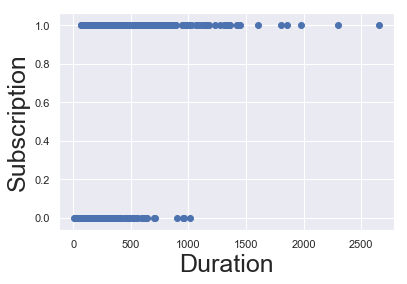

In [242]:
plt.scatter(x1,y)
plt.xlabel('Duration',fontsize = 25)
plt.ylabel('Subscription',fontsize = 25)
plt.show()

## Model expansion

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. We add ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [243]:
estimators = ['interest_rate','march','credit','previous','duration']
X1 = new_data[estimators]
y = new_data['y']

In [255]:
X = sm.add_constant(X1)
regression2 = sm.Logit(y,X)
results2 = regression2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Mon, 01 Feb 2021   Pseudo R-squ.:                  0.5143
Time:                        12:27:35   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
                                        LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0211      0.311     -0.068      0.946      -0.631       0.589
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
credit            2.3585      1.088      2.169      0.030       0.227       4.490
previous          1.5363      0.501      3.067      0.002       0.554       2.518
duration          0.0070      0.001      9.381      0.000       0.006       0.008
=================================================================================
"""

### Confusion Matrix

In [245]:
def confusion_matrix(data,actual_values,model):
    
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy in %
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()*100 #We sum the correct predictions for 0 and 1 and divide over the total sum
        # Return the confusion matrix and 
        return cm, accuracy

In [246]:
cm = confusion_matrix(X,y,results2)
cm

(array([[218.,  41.],
        [ 30., 229.]]), 86.2934362934363)

In [247]:
cm_df = pd.DataFrame(data = cm[0],columns = ['Predicted 0','Predicted 1'])
cm_df = cm_df.rename(index = {0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,218.0,41.0
Actual 1,30.0,229.0


## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [248]:
test_data = pd.read_csv('Bank_data_testing.csv')
test_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4,4.963,0.0,0.0,0.0,0.0,36.0,no


In [249]:
test_data['y'] = test_data['y'].map({'yes':1,'no':0})
test_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4,4.963,0.0,0.0,0.0,0.0,36.0,0


### Declare the dependent and the independent variables

In [250]:
#estimators = ['interest_rate','march','credit','previous','duration']
test_X1 = test_data[estimators]
test_y = test_data['y']
test_X = sm.add_constant(test_X1)

Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [251]:
#Test Accuracy for the test_data
test_cm = confusion_matrix(test_X,test_y,results2)
test_cm

(array([[93., 18.],
        [13., 98.]]), 86.03603603603604)

In [252]:
#Train accuracy for the original data (Performed previously!)
cm = confusion_matrix(X,y,results2)
cm

(array([[218.,  41.],
        [ 30., 229.]]), 86.2934362934363)

In [253]:
#Improved visualization of the test accuracy
chart = pd.DataFrame(data = test_cm[0], columns = ['Predicted 0','Predicted 1'])
chart = chart.rename(index = {0:'Actual 0',1:'Actual 1'})
chart

,Predicted 0,Predicted 1
Actual 0,93.0,18.0
Actual 1,13.0,98.0


Test accuaracy is 86.04% and train accuracy is 86.29%, a difference of 0.25%. Generally it can be expected that the training accuracy is greater than the test one.